In [35]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

In [36]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [37]:
import pandas as pd

In [38]:
data = pd.read_csv('/home/sudarshan/Documents/data_sets/LPOCT/LPOCT_all.dat', sep=';')

In [39]:
usecols = [' SMILES', ' Exp logD']

In [40]:
data = pd.DataFrame(data)

In [41]:
data = data[usecols]

In [42]:
data.rename(columns={' SMILES': 'SMILES', ' Exp logD' : 'logP'}, inplace=True)

In [72]:
m = Chem.MolFromSmiles('CCCCO')

In [75]:
AllChem.ComputedProps?

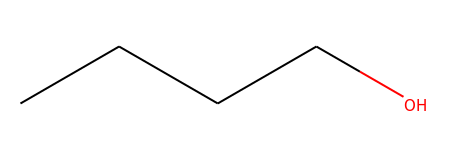

In [74]:
m

In [45]:
new_f = np.empty((data.shape[0], 13))
for i, x in enumerate(data['SMILES'].values):
    m = Chem.MolFromSmiles(x)
    new_f[i, 0] = m.GetNumHeavyAtoms()
    new_f[i, 1] = AllChem.CalcNumRotatableBonds(m)
    new_f[i, 2] = len(m.GetSubstructMatches(Chem.MolFromSmarts('[#7]'))) #nitrogens
    new_f[i, 3] = len(m.GetSubstructMatches(Chem.MolFromSmarts('[#8]'))) #oxygens
    new_f[i, 4] = len(m.GetSubstructMatches(Chem.MolFromSmarts('[#9]'))) #Fluorines
    new_f[i, 5] = len(m.GetSubstructMatches(Chem.MolFromSmarts('[#15]'))) #Phosphorous
    new_f[i, 6] = len(m.GetSubstructMatches(Chem.MolFromSmarts('[#16]'))) #Sulfurs
    new_f[i, 7] = len(m.GetSubstructMatches(Chem.MolFromSmarts('[#17]'))) #Chlorines
    new_f[i, 8] = len(m.GetSubstructMatches(Chem.MolFromSmarts('[#35]'))) #Bromines
    new_f[i, 9] = len(m.GetSubstructMatches(Chem.MolFromSmarts('[#53]'))) #Iodines
    new_f[i, 10] = AllChem.CalcNumAromaticRings(m)
    new_f[i, 11] = AllChem.CalcNumHBA(m)
    new_f[i, 12] = AllChem.CalcNumHBD(m)

In [46]:
new_f2 = pd.DataFrame({"NHA":new_f[:, 0], "NRB":new_f[:, 1], 'NN':new_f[:, 2], 'NO':new_f[:, 3], 'NF':new_f[:, 4], 'NP':new_f[:, 5], 'NS':new_f[:, 6], 'NCl':new_f[:, 7], 'NBr':new_f[:, 8], 'NI':new_f[:, 9], 'NAR':new_f[:, 10],
                      'NHBA':new_f[:, 11], 'NHBD':new_f[:, 12]})

In [47]:
new_f2.head()

,NHA,NRB,NN,NO,NF,NP,NS,NCl,NBr,NI,NAR,NHBA,NHBD
0,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,6.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [48]:
data_new = pd.concat([data, new_f2], axis=1)

In [49]:
data_new.head()

,SMILES,logP,NHA,NRB,NN,NO,NF,NP,NS,NCl,NBr,NI,NAR,NHBA,NHBD
0,CCCCO,0.88,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,CCC(=O)OC,0.82,6.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,CCI,2.00,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,CCOCC,0.89,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,CC(C)Cl,1.90,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
col_for_X = ['NHA', 'NRB', 'NN', 'NO', 'NF', 'NP', 'NS', 'NCl', 'NBr', 'NI', 'NAR', 'NHBA', 'NHBD']
col_for_y = ['logP']

In [54]:
X = data_new[col_for_X]
y = data_new[col_for_y]

In [55]:
X.shape

(693, 13)

In [56]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
knnreg = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

In [59]:
print('R-squared score (Training):', knnreg.score(X_train, y_train))
print('R-squared score (Test):', knnreg.score(X_test, y_test))

R-squared score (Training): 0.9094287913925821
R-squared score (Test): 0.8851757886668798


In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
knnreg2 = KNeighborsRegressor(n_neighbors=5).fit(X_train_scaled, y_train)
print('R-squared score (Training):', knnreg2.score(X_train_scaled, y_train))
print('R-squared score (Test):', knnreg2.score(X_test_scaled, y_test))

R-squared score (Training): 0.8914526651136967
R-squared score (Test): 0.8246845556260639


In [67]:
score = np.empty((10, 3))
for k in range(1, 11):
    knnreg = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    score[k-1, 0] = k
    score[k-1, 1] = knnreg.score(X_train, y_train)
    score[k-1, 2] = knnreg.score(X_test, y_test)   

In [68]:
score

array([[ 1.        ,  0.98210763,  0.90732284],
       [ 2.        ,  0.96023308,  0.91337883],
       [ 3.        ,  0.9349516 ,  0.89143896],
       [ 4.        ,  0.92009395,  0.8886675 ],
       [ 5.        ,  0.90942879,  0.88517579],
       [ 6.        ,  0.89871058,  0.88767961],
       [ 7.        ,  0.89068263,  0.87801893],
       [ 8.        ,  0.88378008,  0.86852181],
       [ 9.        ,  0.87986236,  0.86899471],
       [10.        ,  0.87535156,  0.86154189]])

<IPython.core.display.Javascript object>


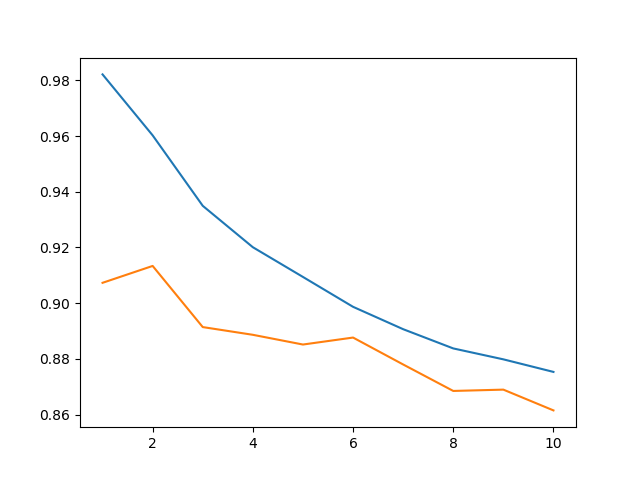

In [79]:
plt.plot(score[:, 0], score[:, 1])
plt.plot(score[:, 0], score[:, 2])

In [76]:
knnreg = KNeighborsRegressor(n_neighbors=6).fit(X_train, y_train)

<IPython.core.display.Javascript object>


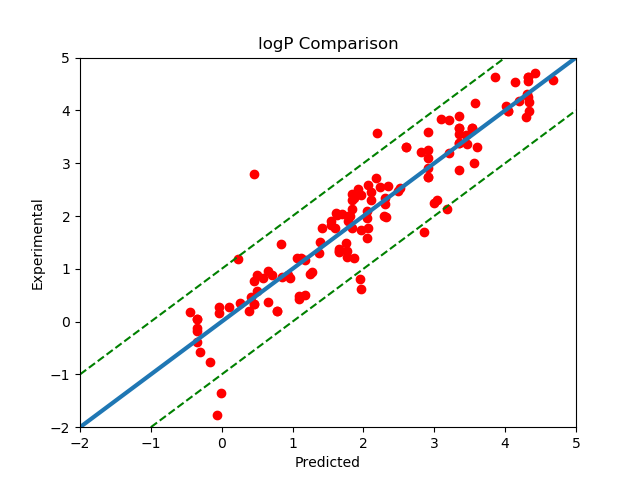

In [97]:
plt.plot(knnreg.predict(X_test), y_test, 'ro')
plt.xlim(-2.0, 5.0)
plt.ylim(-2.0, 5.0)
plt.xlabel('Predicted')
plt.ylabel('Experimental')
plt.title("logP Comparison")
#plt.legend()

#A straight line
x = np.linspace(-2, 5, 28)
y = np.copy(x)
x2 = np.linspace(-1, 5, 24)
y2 = x2-1
x3 = np.linspace(-2, 4, 24)
y3 = x3+1
plt.plot(x, y, linewidth=3)
plt.plot(x2, y2, linestyle='dashed', color='green')
plt.plot(x3, y3, linestyle='dashed', color='green')